In [1]:
% load_ext autoreload
% autoreload 2


In [97]:
from pseudo import *
import blasius
import matplotlib.pyplot as plt
import ops
import scipy as sp
%matplotlib inline

Eigenvalue solution returned with error norm: 4.05632020087e-11
(162,) (162, 162) (81,)


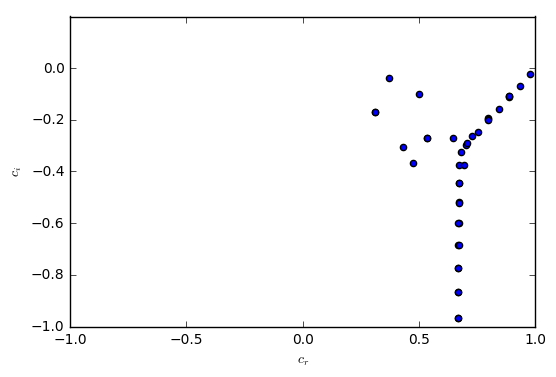

In [102]:
flowDict = {'a':0.5, 'b':1., 'Re':2000.}
N = 81
y = chebdif(N+2,1)[0]
y = y[1:-1]
U = 1.- y**2; dU = -2.*y; d2U=-2.*np.ones(U.size)
#linOps = ops.linearize(N=N,flowClass="channel", U=U, dU=dU, d2U=d2U )
linOps = ops.linearize(N=N,flowClass="channel")

evals, evecs = linOps.eig(linOps.OSS(**flowDict), weighted=True)
#evals, evecs = linOps.eig(OSS, b=b, weighted=True)
print(evals.shape, evecs.shape, y.shape)

omega = -1.j*evals
c = omega/flowDict['a']
#c = omega
if True:
    plt.scatter(c.real, c.imag)
    plt.xlim([-1.,1.])
    plt.ylim([-1.,0.2])
    plt.xlabel("$c_r$"); plt.ylabel("$c_i$")
    plt.show()

In [103]:
ind = np.argsort(-c.imag)
cSort = c[ind]
print(cSort[:20])
#c = cSort

[ 0.97763932-0.02361068j  0.37226932-0.03737398j  0.93291797-0.06833204j
  0.49935556-0.09920592j  0.88770220-0.10945538j  0.88808805-0.10962449j
  0.88819669-0.11305351j  0.84347472-0.15777756j  0.31232252-0.16986946j
  0.31232252-0.16986946j  0.79534673-0.19331077j  0.79830962-0.19657914j
  0.79871747-0.20251583j  0.75360282-0.24701616j  0.72648153-0.26096201j
  0.64779065-0.26971348j  0.53467243-0.27140532j  0.53470480-0.27146759j
  0.70903618-0.28784882j  0.70474692-0.29872825j]


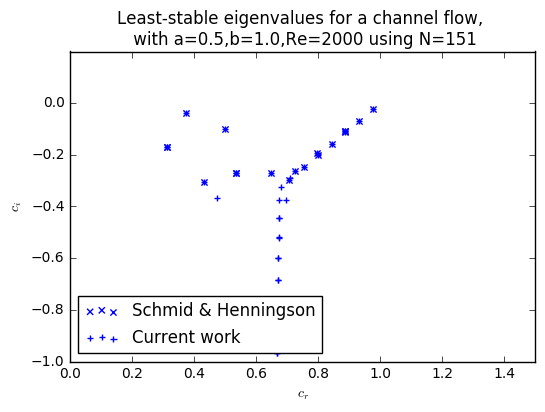

In [9]:
N = 50; Y = 10
y,DM = chebdifBL(N,Y)
D1 = DM[:,:,0]
D2 = DM[:,:,1]
D3 = DM[:,:,2]

U,dU = blasius.blasius(y)

/home/sabarish/Dropbox/melb/code/library/pseudo.py:490: UserWarning: Differentiation matrices for BLs only work on quantities that go to 0 as y -> inf.
  warn("Differentiation matrices for BLs only work on quantities that go to 0 as y -> inf.")


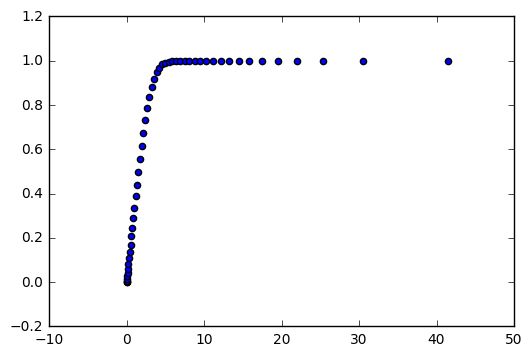

In [11]:
plt.scatter(y,U)

In [12]:
np.dot(D3,U) + U*np.dot(D2,U)

array([  1.92071945e+04,   6.33982194e+03,  -1.30521589e+03,
         5.55453656e+02,  -3.06525785e+02,   1.93661150e+02,
        -1.33004828e+02,   9.66123697e+01,  -7.31280903e+01,
         5.70051396e+01,  -4.55765015e+01,   3.70295786e+01,
        -3.06660568e+01,   2.55628032e+01,  -2.17070130e+01,
         1.83765723e+01,  -1.59161013e+01,   1.35792559e+01,
        -1.19640281e+01,   1.02254099e+01,  -9.14570082e+00,
         7.80511776e+00,  -7.05489587e+00,   6.02447281e+00,
        -5.44926948e+00,   4.69261064e+00,  -4.19417675e+00,
         3.66466426e+00,  -3.21969668e+00,   2.83828585e+00,
        -2.46789523e+00,   2.16570822e+00,  -1.87553064e+00,
         1.62621221e+00,  -1.39844529e+00,   1.19591046e+00,
        -1.01435228e+00,   8.52266534e-01,  -7.07887748e-01,
         5.79779181e-01,  -4.66700613e-01,   3.67592792e-01,
        -2.81555055e-01,   2.07828405e-01,  -1.45783413e-01,
         9.49149212e-02,  -5.48509149e-02,   2.54036251e-02,
        -6.78567725e-03,